In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading cleaned dataset 
df = pd.read_excel("D:/GOKLYN INTERNSHIP 2025/zomato.csv/clean data.xlsx")
df.head()

,restaurant_name,online_order,book_table,rating,votes,location,rest_type,cuisines,price,listed_in(type),city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [3]:
df.isnull().sum()

restaurant_name    0
online_order       0
book_table         0
rating             0
votes              0
location           0
rest_type          0
cuisines           0
price              0
listed_in(type)    0
city               0
dtype: int64

In [4]:
# Group by price and aggregate average rating and total votes
price_rating_group = df.groupby('price').agg(
    average_rating=('rating', 'mean'),
    total_votes=('votes', 'sum'),
    count_of_restaurants=('restaurant_name', 'count')
).reset_index()

# Display the grouped data
print(price_rating_group)

    price  average_rating  total_votes  count_of_restaurants
0      40        3.725000         1056                     8
1      50        3.650000           66                     6
2      70        3.300000            5                     1
3      80        3.400000            7                     1
4     100        3.562264        29143                   636
..    ...             ...          ...                   ...
58   4000        4.117241         8135                    29
59   4100        4.100000         1236                     4
60   4500        4.300000          106                     2
61   5000        4.300000          413                     1
62   6000        4.300000          254                     2

[63 rows x 4 columns]


C:\Users\Asus\AppData\Local\Temp\ipykernel_14828\1771620035.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='price', y='rating', data=avg_rating_by_unique_price, palette='coolwarm')


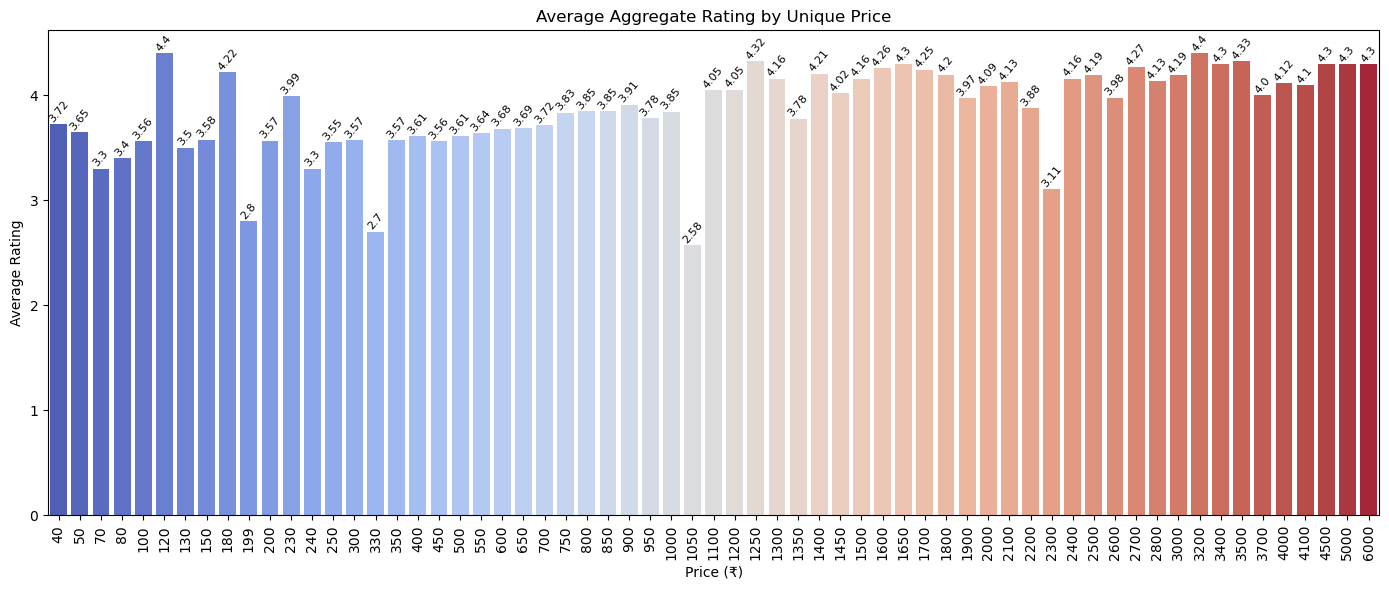

In [5]:
# Group by unique prices and compute average rating
avg_rating_by_unique_price = df.groupby('price')['rating'].mean().reset_index()

# Sort by price for better readability
avg_rating_by_unique_price = avg_rating_by_unique_price.sort_values('price')

# Plot bar chart
plt.figure(figsize=(14, 6))
bar_plot = sns.barplot(x='price', y='rating', data=avg_rating_by_unique_price, palette='coolwarm')

# Add value labels to each bar
for index, row in avg_rating_by_unique_price.iterrows():
    bar_plot.text(index, row.rating + 0.02, round(row.rating, 2),
                  color='black', ha="center", rotation=50, fontsize=8)

# Style
plt.title('Average Aggregate Rating by Unique Price')
plt.xlabel('Price (₹)')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14828\1902642195.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='price', y='votes', data=votes_by_unique_price, palette='magma')


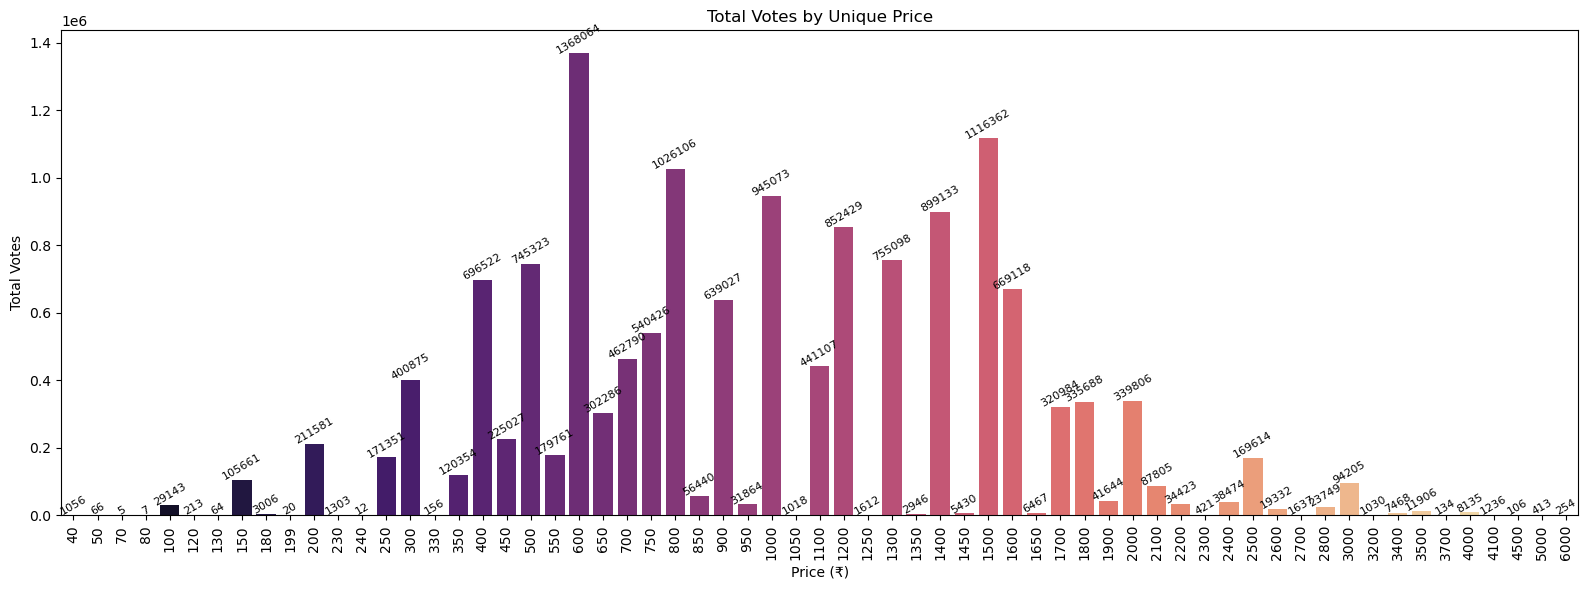

In [6]:
# Group by unique prices and compute total votes
votes_by_unique_price = df.groupby('price')['votes'].sum().reset_index()

# Sort by price
votes_by_unique_price = votes_by_unique_price.sort_values('price')

# Plot bar chart
plt.figure(figsize=(16, 6))
bar_plot = sns.barplot(x='price', y='votes', data=votes_by_unique_price, palette='magma')

# Add labels on top of each bar
for index, row in votes_by_unique_price.iterrows():
    bar_plot.text(index, row.votes + 5, int(row.votes), 
                  color='black', ha="center", rotation=30, fontsize=8)

# Styling
plt.title('Total Votes by Unique Price')
plt.xlabel('Price (₹)')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
# 1. Count of restaurants in each price group
restaurant_count = df.groupby('price')['restaurant_name'].count().reset_index(name='restaurant_count')
most_common_price_by_count = restaurant_count.sort_values(by='restaurant_count', ascending=False).head(1)

print("🔹 Most chosen price range based on number of restaurants:")
print(most_common_price_by_count)



# 2. Total votes in each price group (popularity by customer engagement)
vote_sum = df.groupby('price')['votes'].sum().reset_index(name='total_votes')
most_common_price_by_votes = vote_sum.sort_values(by='total_votes', ascending=False).head(1)

print("\n🔹 Most chosen price range based on total customer votes:")
print(most_common_price_by_votes)

🔹 Most chosen price range based on number of restaurants:
    price  restaurant_count
17    400              5265

🔹 Most chosen price range based on total customer votes:
    price  total_votes
21    600      1368064
